In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("/Users/ajita/Desktop/dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.id[]

SyntaxError: invalid syntax (<ipython-input-8-414a5687076f>, line 1)

In [6]:
# to check for missing values and correcting them

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# handeling 201 value of bmi by filling the missing value using the mean value of the column.
##read ways to handle missing data and how to do it

In [8]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True) #inplace - will return nothing, data will be modified

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


# Understanding columns

In [10]:
# GENDER

gender_stroke=df.groupby(["gender","stroke"])[["stroke"]].count()
gender_stroke


stroke
gender stroke        
Female 0         2853
       1          141
Male   0         2007
       1          108
Other  0            1

In [11]:
# gender "other" has only 1 row, hence replacing it with female (more rows).

df['gender'].replace('Other','Female',inplace=True)

gender_stroke=df.groupby(["gender","stroke"])[["stroke"]].count()
gender_stroke



stroke
gender stroke        
Female 0         2854
       1          141
Male   0         2007
       1          108

<AxesSubplot:xlabel='gender'>

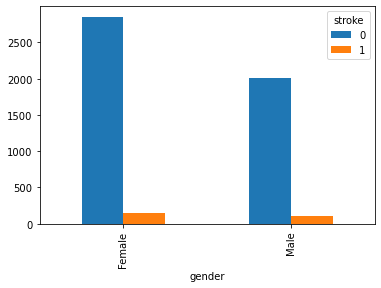

In [12]:
pd.crosstab(df['gender'],df['stroke']).plot.bar()

In [13]:
# AGE

age_stroke=df.groupby(["age","stroke"])[["stroke"]].count()
age_stroke

stroke
age   stroke        
0.08  0            2
0.16  0            3
0.24  0            5
0.32  0            5
0.40  0            2
...              ...
80.00 1           17
81.00 0           46
      1           14
82.00 0           47
      1            9

[148 rows x 1 columns]

<AxesSubplot:xlabel='age'>

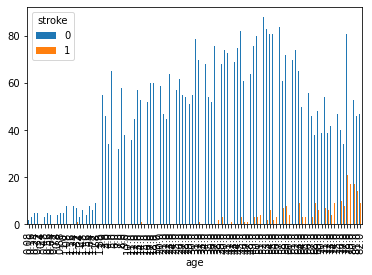

In [14]:
pd.crosstab(df['age'],df['stroke']).plot.bar()

In [15]:
# HYPERTENSION

hypertension_stroke=df.groupby(["hypertension","stroke"])[["stroke"]].count()
hypertension_stroke

stroke
hypertension stroke        
0            0         4429
             1          183
1            0          432
             1           66

<AxesSubplot:xlabel='hypertension'>

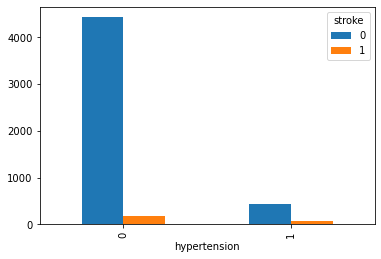

In [16]:
pd.crosstab(df['hypertension'],df['stroke']).plot.bar()

In [17]:
# HEART DISEASE
heart_dis_stroke=df.groupby(["heart_disease","stroke"])[["stroke"]].count()
heart_dis_stroke

stroke
heart_disease stroke        
0             0         4632
              1          202
1             0          229
              1           47

<AxesSubplot:xlabel='heart_disease'>

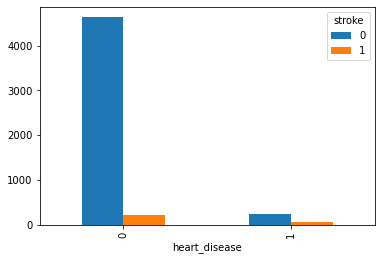

In [18]:
pd.crosstab(df['heart_disease'],df['stroke']).plot.bar()

In [19]:
# EVER_MARRIED

ever_married_stroke=df.groupby(["ever_married","stroke"])[["stroke"]].count()
ever_married_stroke

stroke
ever_married stroke        
No           0         1728
             1           29
Yes          0         3133
             1          220

<AxesSubplot:xlabel='ever_married'>

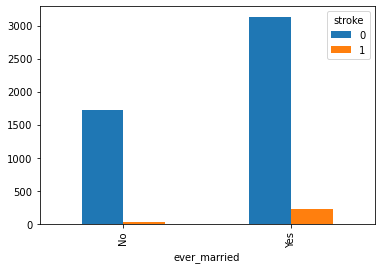

In [20]:
pd.crosstab(df['ever_married'],df['stroke']).plot.bar()

In [21]:
# WORK_TYPE

work_type_stroke=df.groupby(["work_type","stroke"])[["stroke"]].count()
work_type_stroke

stroke
work_type     stroke        
Govt_job      0          624
              1           33
Never_worked  0           22
Private       0         2776
              1          149
Self-employed 0          754
              1           65
children      0          685
              1            2

<AxesSubplot:xlabel='work_type'>

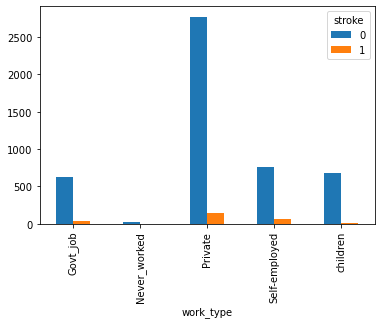

In [22]:
pd.crosstab(df['work_type'],df['stroke']).plot.bar()

In [23]:
# RESIDENCE TYPE

residence_type_stroke=df.groupby(["Residence_type","stroke"])[["stroke"]].count()
residence_type_stroke

stroke
Residence_type stroke        
Rural          0         2400
               1          114
Urban          0         2461
               1          135

<AxesSubplot:xlabel='Residence_type'>

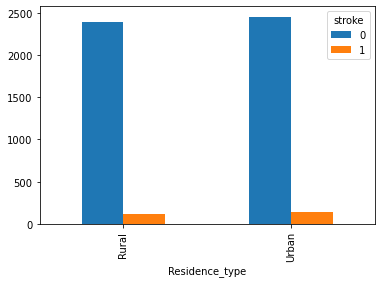

In [24]:
pd.crosstab(df['Residence_type'],df['stroke']).plot.bar()

In [25]:
# AVERAGE GLUCOSE LEVEL

avg_glucose_level_stroke=df.groupby(["avg_glucose_level","stroke"])[["stroke"]].count()
avg_glucose_level_stroke

,,stroke
avg_glucose_level,stroke,
55.12,0,1
55.22,0,1
55.23,0,1
55.25,0,1
55.26,0,1
...,...,...
266.59,0,1
267.60,0,1
267.61,0,1


In [26]:
# BMI

bmi_stroke=df.groupby(["bmi","stroke"])[["stroke"]].count()
bmi_stroke

,,stroke
bmi,stroke,
10.3,0,1
11.3,0,1
11.5,0,1
12.0,0,1
12.3,0,1
...,...,...
66.8,0,1
71.9,0,1
78.0,0,1


In [27]:
# SMOKING

smoking_status_stroke=df.groupby(["smoking_status","stroke"])[["stroke"]].count()
smoking_status_stroke

stroke
smoking_status  stroke        
Unknown         0         1497
                1           47
formerly smoked 0          815
                1           70
never smoked    0         1802
                1           90
smokes          0          747
                1           42

<AxesSubplot:xlabel='smoking_status'>

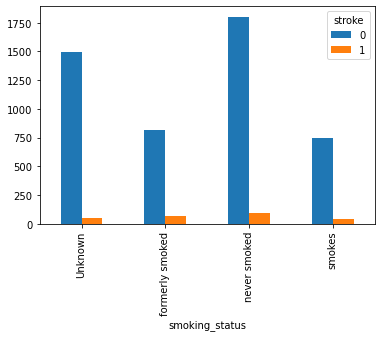

In [28]:
pd.crosstab(df['smoking_status'],df['stroke']).plot.bar()

In [29]:
df_le = df
df_le

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [30]:
# before finding corelation between the columns and stroke, we need to handle catagorical data.

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df_le['gender'] = le.fit_transform(df_le['gender'])
df_le['ever_married'] = le.fit_transform(df_le['ever_married'])
df_le['work_type'] = le.fit_transform(df_le['work_type'])
df_le['Residence_type'] = le.fit_transform(df_le['Residence_type'])
df_le['smoking_status'] = le.fit_transform(df_le['smoking_status'])
df_le

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [33]:
df_le.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.001776,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.002999,0.014074,0.006388
gender,0.001776,1.000000,-0.027623,0.021275,0.085717,-0.029936,0.056597,-0.005937,0.054580,-0.025464,-0.062360,0.009117
age,0.003538,-0.027623,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.003550,0.021275,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,-0.001296,0.085717,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,0.013690,-0.029936,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,-0.015757,0.056597,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.001403,-0.005937,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.001092,0.054580,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,0.002999,-0.025464,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947


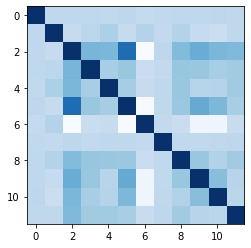

In [34]:
plt.imshow(df_le.corr(),cmap='Blues',interpolation='nearest')

(<AxesSubplot:>,)

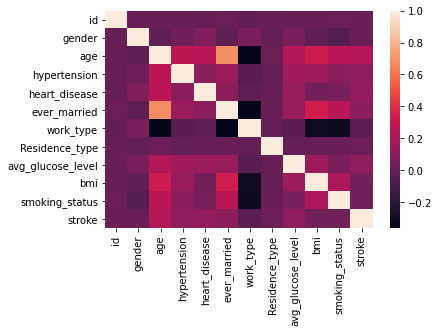

In [35]:
sb.heatmap(df_le.corr()),# annot=True, annot_kws={'size': })

In [36]:
df_le.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# LOGISTIC REGRESSION 

In [37]:
# defining predictand and predictors

x = df_le[['age', 'hypertension', 'heart_disease', 'ever_married',
         'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
y = df_le[['stroke']]

# removing id, gender and work_type as they have least significa


<AxesSubplot:ylabel='stroke'>

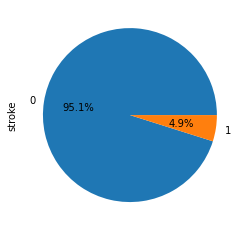

In [85]:
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%')

In [39]:
# this dataset is highly unbalanced as there  is 95% "no stoke" data, and only 4% "stroke" data which
#will result into partiality towars no stoke.

In [40]:
# train test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report

In [41]:
# model without unbalacing the data

In [42]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(x, y)

In [43]:
len(x_train_o), len(y_train_o)

(3832, 3832)

In [44]:
len(x_test_o), len(y_test_o)

(1278, 1278)

In [45]:
lr = LogisticRegression()

lr_model = lr.fit(x_train_o, y_train_o)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
y_pred_o = lr_model.predict(x_test_o)

In [47]:
ac_score = acc(y_test_o, y_pred_o)
ac_score

0.9577464788732394

In [49]:
print(classification_report(y_pred_o,y_test_o))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1278
           1       0.00      0.00      0.00         0

    accuracy                           0.96      1278
   macro avg       0.50      0.48      0.49      1278
weighted avg       1.00      0.96      0.98      1278



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# balancing data using under sampling

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [51]:
over = RandomOverSampler()
under = RandomUnderSampler()
x_over, y_over = over.fit_resample(x, y)
x_bal, y_bal = under.fit_resample(x_over, y_over)

<AxesSubplot:ylabel='None'>

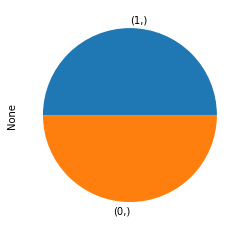

In [82]:
y_bal.value_counts().plot.pie()

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal)
lr = LogisticRegression()

lr_model = lr.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

ac_score_lr = acc(y_test, y_pred)
ac_score_lr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7515425750719869

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1115
           1       0.79      0.74      0.76      1316

    accuracy                           0.75      2431
   macro avg       0.75      0.75      0.75      2431
weighted avg       0.75      0.75      0.75      2431



In [55]:
# accuracy using balanced data reduces but it will not generalise the model 

# SVM

In [56]:
from sklearn import svm

In [57]:
svm_model = svm.SVC(kernel='linear') 

In [58]:
svm_model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [59]:
y_pred = svm_model.predict(x_test)

In [60]:
ac_score_svm = acc(y_test, y_pred)
ac_score_svm

0.7589469354175237

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1075
           1       0.81      0.74      0.77      1356

    accuracy                           0.76      2431
   macro avg       0.76      0.76      0.76      2431
weighted avg       0.76      0.76      0.76      2431



# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [63]:
ac_score_knn = acc(y_test, y_pred)
ac_score_knn

0.9452900041135335

In [64]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1064
           1       1.00      0.90      0.95      1367

    accuracy                           0.95      2431
   macro avg       0.94      0.95      0.95      2431
weighted avg       0.95      0.95      0.95      2431



# DECISION TREE

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt_model=DecisionTreeClassifier(max_depth=4)

In [67]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [68]:
y_pred=dt_model.predict(x_test)

In [69]:
ac_score_dt = acc(y_test, y_pred)
ac_score_dt

0.7688194158782394

In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1089
           1       0.82      0.75      0.78      1342

    accuracy                           0.77      2431
   macro avg       0.77      0.77      0.77      2431
weighted avg       0.77      0.77      0.77      2431



# NAIVE BAYES

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
nb_model = GaussianNB()

In [73]:
nb_model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [74]:
y_pred = nb_model.predict(x_test)

In [75]:
ac_score_nb = acc(y_test, y_pred)
ac_score_nb

0.7317976141505553

In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1157
           1       0.75      0.73      0.74      1274

    accuracy                           0.73      2431
   macro avg       0.73      0.73      0.73      2431
weighted avg       0.73      0.73      0.73      2431



In [79]:
print("logistic regression : ", ac_score_lr, "svm : ", ac_score_svm, "knn : ", ac_score_knn,
      "decision tree : " , ac_score_dt, "naive bayes : ", ac_score_nb)

logistic regression :  0.7515425750719869 svm :  0.7589469354175237 knn :  0.9452900041135335 decision tree :  0.7688194158782394 naive bayes :  0.7317976141505553


In [ ]:
# knn give max. accuracy
